<a href="https://colab.research.google.com/github/Venchislav/Stats-for-DS/blob/main/ANOVA_lm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [22]:
data = pd.read_csv('https://stepik.org/media/attachments/lesson/9250/birds.csv')

In [28]:
print(data)

         var4  hormone  sex
0   17.859039        1    1
1   20.842343        1    1
2   19.318099        1    1
3   20.064451        1    1
4   17.620316        1    1
..        ...      ...  ...
59  17.054195        0    0
60  22.951551        0    0
61  18.799382        0    0
62  16.543161        0    0
63  25.683038        0    0

[64 rows x 3 columns]


In [25]:
formula = 'var4 ~ hormone*sex'
model = ols(formula, data).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

                 sum_sq    df         F    PR(>F)
hormone        0.847472   1.0  0.086528  0.769653
sex            0.119762   1.0  0.012228  0.912318
hormone:sex   89.483384   1.0  9.136390  0.003682
Residual     587.650394  60.0       NaN       NaN


Here only interaction of 2 variables made some sense

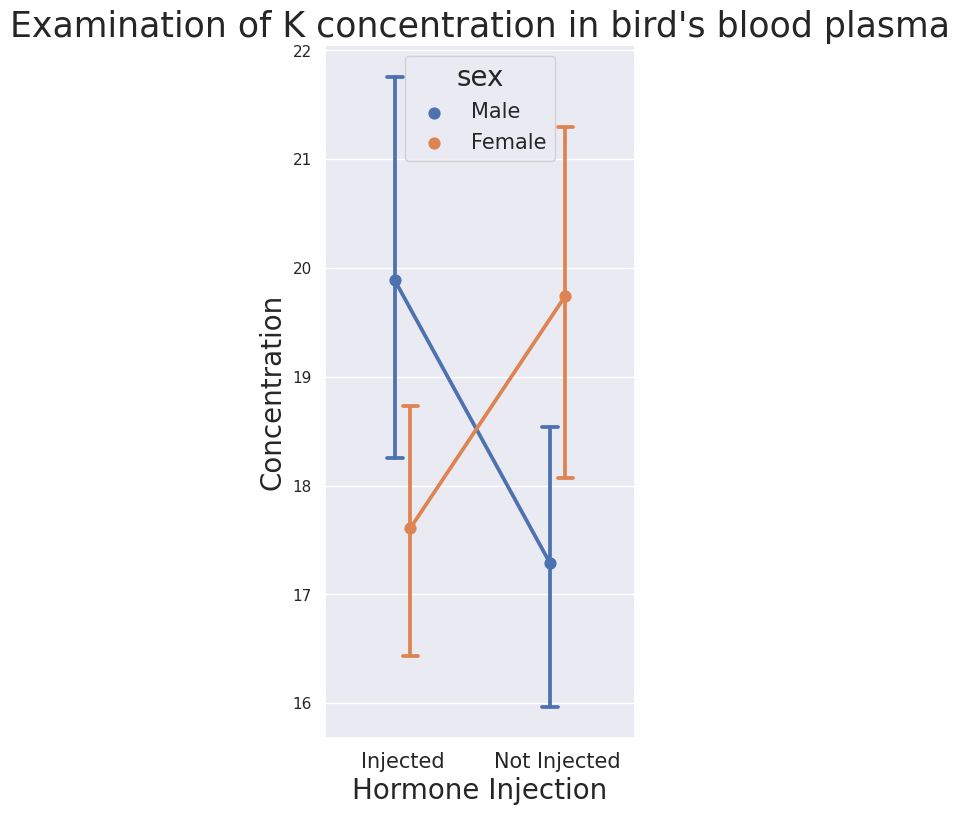

In [35]:
sns.set(rc={'figure.figsize':(4, 9)})
pplot = sns.pointplot(x='hormone', y='var4', hue='sex',\
                      dodge=0.1, capsize=0.1,\
                      data=data)

plt.title("Examination of K concentration in bird's blood plasma", fontsize=25)
plt.xlabel('Hormone Injection', fontsize=20)
plt.ylabel('Concentration', fontsize=20)


# меняем названия отложенных по оси х значений

bars = ('Injected', 'Not Injected')
x_pos = np.arange(len(bars))
plt.xticks(x_pos, bars, fontsize=15)


# меняем "Легенду" та, что в верхнем правом углу

leg_handles = pplot.get_legend_handles_labels()[0]
pplot.legend(leg_handles, ['Male', 'Female'], title='sex', title_fontsize=20, fontsize=15)